<a href="https://colab.research.google.com/github/chalkpetro/Python-Notebooks/blob/main/Module01_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 01 Assignment: Expolratory Data Analyis

Nikolas Petroff DS2500

# Exploratory Data Analysis of Health Insurance Costs
Heath insurance has become increasingly more expensive over the recent years. This is not only concerning, but makes one wonder...why is this? The US healthcare system has always been debatably too expensive for the paycheck to paycheck individual. A question I'd like to explore, is "How do BMI and smnoking status individually and in combination affect health insurance costs?".
#**1. Formulate the question**
One analysis we can use to see if there is a correlation beteween health insurance cost and smoking status/BMI etc. is compare the cost of health insurance for people who smoke, to those who do not smoke. Also, do individuals with an above average BMI pay more for health insurance? We are going to rely on the data found in HealthInsurance.csv to gather our insights

In [1]:
# Imports
%matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import scipy.stats as stats
%matplotlib inline

# Set visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

ModuleNotFoundError: No module named 'matplotlib'

#**2. Read in your data**

Reading in the Health Insurance data


In [2]:
# Load the dataset
healthData_df = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/main/Module_Assignment-1/Health_Insurance_Costs/insurance.csv')
print(healthData_df.head())
print(healthData_df.info())

NameError: name 'pd' is not defined

#**3. Check the packaging**
Verifying the data is well formatted and clean up data if necesssary

In [ ]:
healthData_df.shape

(1338, 7)

#**4. Look at the top and bottom of data**
Confirming all data is there and ready to be analyzed


In [ ]:
healthData_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
healthData_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Clean/prep data

In [ ]:
#Look for any missing stuff
missing_vals = healthData_df.isnull().sum()
print("Missing values in each column: \n", missing_vals)

#Check data
print("\nData types of each column:\n", healthData_df.dtypes)

#**5. Check the "n"s**

Smoker should be a 'yes' or 'no' with  1337 entries

BMI should be a value between 18.5 and 35 (roughly) with 1337 entries


In [ ]:
healthData_df['smoker'].head

<bound method NDFrame.head of 0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object>

In [ ]:
healthData_df['bmi'].head

<bound method NDFrame.head of 0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64>

#**5. Visuals**

Brief overview of the data


In [ ]:
#Summarized stats for columns w/ numbers
print(healthData_df.describe())

#Distribution for categorical variables
print("\nSmoker status counts:\n", healthData_df['smoker'].value_counts())
print("\nRegion distribution:\n", healthData_df['region'].value_counts())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Smoker status counts:
 no     1064
yes     274
Name: smoker, dtype: int64

Region distribution:
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1) Histogram plot of Insurance Costs

This histogram shows the distribution of insurance charges by policyholder. It demonstrates the frequency of insurance charges, helping us to better see how these charges are spread, and where the majority of charges are. Using 30 'bins' divides the data set into 30 seperate 'bins' to demonstrate the pattern in insurance charges

x-axis shows the range of insurance charges,
y-axis shows the count (or number of) policyholders that fall into each bin.




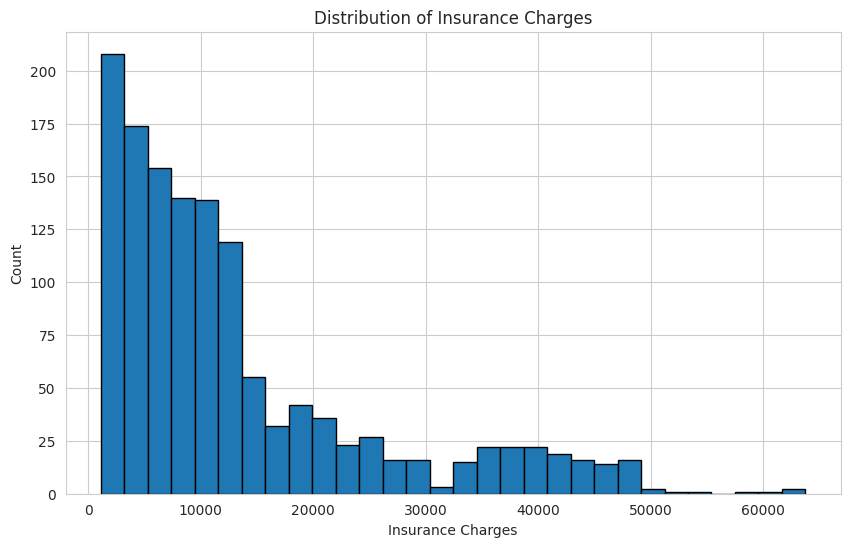

In [ ]:
healthData_df['charges'].hist(bins=30, edgecolor='black')
plt.xlabel('Insurance Charges')
plt.ylabel('Count')
plt.title('Distribution of Insurance Charges')
plt.show()

In [ ]:
#  correlation coefficient
print(healthData_df['bmi'].corr(healthData_df['charges']))


0.19834096883362895


Box Plot of insurance charges by smoking status

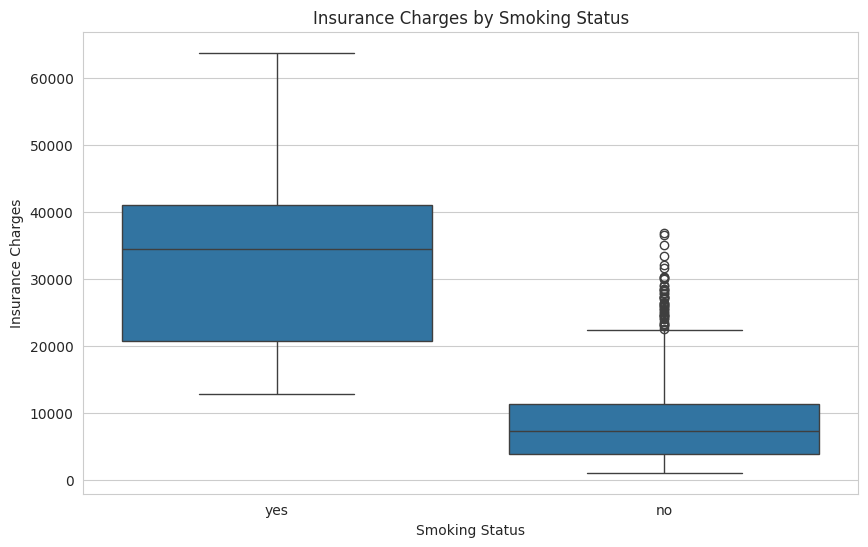

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='smoker', y='charges', data=healthData_df)
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Insurance Charges')
plt.show()


To better unserstand the relationship between insurance charges for smokers vs non smokers, we can compare the average charges between the two

In [ ]:
# Average insurance charges by smoking status
smokers_mean_charge = healthData_df[healthData_df['smoker'] == 'yes']['charges'].mean()
non_smokers_mean_charge = healthData_df[healthData_df['smoker'] == 'no']['charges'].mean()
print(f"Smokers: {smokers_mean_charge}, Non-smokers: {non_smokers_mean_charge}")


Smokers: 32050.23183153284, Non-smokers: 8434.268297856204


Scatter plot of BMI vs. Insurance charges. This scatterplot has two colors to differentiate smokers from non-smokers.

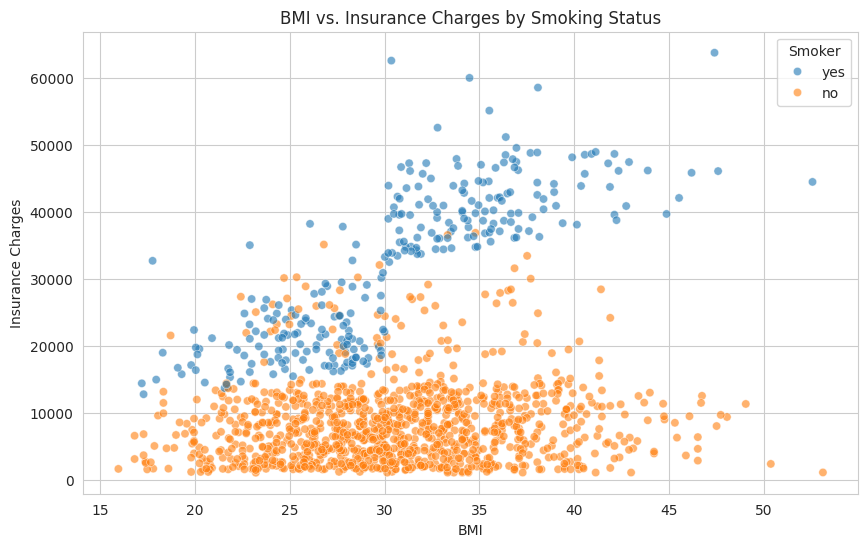

In [ ]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=healthData_df, alpha=0.6)
plt.title('BMI vs. Insurance Charges by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker')
plt.show()


The scatter plot, at face value, shows that if and you're a smoker, your insurance cost is significantly higher than the non-smoker. Another insight we can gather from the plot, is that BMI does NOT seem to affect insurance charges nearly as much as a smoking does.

In [ ]:
correlation_coefficient = healthData_df['bmi'].corr(healthData_df['charges'])
print(f"Overall Pearson correlation coefficient between BMI and insurance charges: {correlation_coefficient:.3f}")

Overall Pearson correlation coefficient between BMI and insurance charges: 0.198


In [ ]:
# Correlation for smokers
correlation_smokers = healthData_df[healthData_df['smoker'] == 'yes']['bmi'].corr(healthData_df[healthData_df['smoker'] == 'yes']['charges'])
print(f"Pearson correlation coefficient between BMI and insurance charges for smokers: {correlation_smokers:.3f}")

# Correlation for non-smokers
correlation_non_smokers = healthData_df[healthData_df['smoker'] == 'no']['bmi'].corr(healthData_df[healthData_df['smoker'] == 'no']['charges'])
print(f"Pearson correlation coefficient between BMI and insurance charges for non-smokers: {correlation_non_smokers:.3f}")


Pearson correlation coefficient between BMI and insurance charges for smokers: 0.806
Pearson correlation coefficient between BMI and insurance charges for non-smokers: 0.084


In [ ]:
# Separate the charges into two groups: smokers and non-smokers
smoker_charges = healthData_df[healthData_df['smoker'] == 'yes']['charges']
non_smoker_charges = healthData_df[healthData_df['smoker'] == 'no']['charges']

# Perform the T-test for the means of two independent samples
t_stat, p_value = stats.ttest_ind(smoker_charges, non_smoker_charges)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 46.66492117272371
P-value: 8.271435842179102e-283


#**5. Reflection and Write-Up**


*Question*
The United States healthcare system has always had push-back. For what reasons? There are many factors that go into the pricing of health insurance, most of which the average person probably doesn’t know. In this exploratory data analysis, I dive into the connection (if any) between Body Mass Index (BMI), smoking vs non-smoking individuals, and both these parameters connection to the cost of each policyholder’s healthcare charges. I chose this dataset because I know little to nothing about insurance, and figured I could learn a thing or two. I was also curious as to how these huge insurance companies determine the cost of healthcare for different individuals. Most importantly, “Is there a connection between BMI, smoking or non-smoking, and the cost of insurance. If so, how are they connected?”. I set out to learn how BMI and smoking status connect to affect insurance charges. I would call into question the use of BMI as an indicator for “health” because it doesn’t accurately account for body fat/muscle tissue. For instance, someone could be over 30 on BMI but be sub 10s in body fat and have a high amount of muscle tissue. Although, smoking is a different story. One may be able to understand why someone who smokes pays more in insurance charges. All this said, the data analysis I did demonstrates a few interesting and key points that I did not expect to find.


*Visualization* The scatter plot is very telling. The x-axis is BMI. The y-axis is Insurance charges, and dots (yellow for non-smokers, blue for smokers)
I chose the scatter plot because with 1337 entries in the dataset, I figured it would be an easy and efficient way to see ‘all’ the data in one place, while being compared to multiple different parameters (BMI/smoking status/charges). The scatterplot shows that all blue dots are above roughly $13,000 in charges, while the yellow dots are often equal to, or less than that. Another thing I found indicative on the scatter plot, is that the BMI has little effect on insurance charges. I expected individuals with a higher BMI to have higher insurance charges. I was completely wrong. Also, as I expected, smokers generally incur more healthcare charges than non-smokers. There is also a notable increase in insurance charges for individuals with a BMI above 30, and smokers. If your BMI is greater than 30, and you’re a smoker, you’re likely paying through the roof in insurance charges compared to all other individuals in the dataset. I find the boxplot and scatter plots to very well demonstrate that smoking has a large effect on health insurance costs. All visuals considered, the combined effect of BMI and smoking status on insurance charges shows that lifestyle choices can have a double impact on health-related financial expenses.


*Statistical Methods*
Initially when taking a look into this data set, it stood out that the average insurance cost across all individuals was $13,270, with a significant variance around that average for the dataset. I used the Pearson correlation coefficient to find a good indicator of whether BMI and insurance charges are correlated, or if smoking status is a better indicator of insurance charges. The Pearson coefficient does just that. The Pearson correlation coefficient between BMI and insurance charges for smokers is 0.806, indicating a strong relationship suggesting that as BMI increases, insurance costs tend to increase as well. A higher BMI is associated with a higher insurance cost for smokers. 0.806 being close to 1 indicated a very strong relationship between the two. Smokers face significantly higher insurance charges than non-smokers, as seen in the scatter plot. The correlation coefficient being relatively close to one indicates that BMI acts as a crucial factor in determining the health insurance premiums for smokers, likely due to the health risks within this demographic of smokers. Smoking status dramatically increases insurance charges, with smokers paying significantly more on average than nonsmokers.

*Data Ethics Canvas*
I found the Data Ethics Canvas useful in a sense that I tried to prove multiple points relative to the health insurance data. Reflecting on the ethics of this analysis, there is a particular focus on the smoker’s subgroup in this dataset. This brings forward ethical considerations for companies that are charging such expensive premiums for smokers with a BMI over 30.0. This also makes me think about the privacy of those who chose to share their data. Overall, this makes me think about the fairness of insurance pricing. Insurance companies charging different premiums for different lifestyles isn’t a square playing field. To draw a parallel to a real-world data ethics issue, take facial-recognition software used by law enforcement for example. It may sound like a good idea, yet there are astronomical privacy concerns, and questions to be raised. Is the sole purpose to increase public safety? Another issue with this could be consent. Using facial recognition technology could be argued to be a violation of personal freedom. Where will all the data be stored? Is it stored safely? Who can all access it? There are many questions to be raised, but this gives a solid example how the Data Ethics Canvas can be of use. The Data Ethics Canvas can help to broaden your view and better understand a topic as a whole.